In [3]:
import numpy as np
from plt_logistic_loss import  plt_logistic_cost
import copy, math
from sklearn.linear_model import LogisticRegression

# Supervised Machine Learning

## 2. Classification

<img align="left" src="./images/C1_W3_Classification.png"     style=" width:550px; padding: 30px; " > 

There are two types of classification problems:
*   Binary Classification (two classes only)
*   Multiclass Classification (more than two classes)

Examples of classification problems:

* Identifying email as Spam or Not Spam
* Determining if a tumor is malignant or benign.

In particular, these are examples of *binary* classification where there are two possible outcomes.  Outcomes can be  described in pairs of 'positive'/'negative' such as 'yes'/'no, 'true'/'false' or '1'/'0'.

In Classification, we use lines or curves called `Decision Boundaries` to separate classes.

### A. Logistic Regression

#### Sigmoid or Logistic Function

<figure>
    <center> <img src="./images/C1_W3_LogisticRegression.png"  style="width:700px;height:380px;" ></center>
</figure>

As discussed in the lecture videos, for a classification task, we can start by using our linear regression model,
$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b $
, to predict $y$ given $x$.

- However, we would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1. 
- This can be accomplished by using a "sigmoid function" which maps all input values to values between 0 and 1. 

##### Formula for Sigmoid function

$$ g(z) = \frac{1}{1+e^{-z}}\tag{1} $$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 
- The implementation of the sigmoid function should cover both of these potential input formats.

##### Sigmoid Implementation with Python

In [4]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

#### Logistic Regression Formula

From equation (1), letting:

$$ z = {\overrightarrow{w}}\cdot{{\overrightarrow{x}}}+b \tag{2} $$

, then the logsitc regression formula can be written as:

$$ f_{\overrightarrow{w},b}(\overrightarrow{x}) = g({\overrightarrow{w}}\cdot{{\overrightarrow{x}}}+b) = \frac{1}{1+e^{-({\overrightarrow{w}}\cdot{{\overrightarrow{x}}}+b)}} = P(y = 1|x;\overrightarrow{w},b) \tag{3} $$

Logistic regression formula calculates the <b>probability</b> of $y = 1$; given $x$ and with parameters $\overrightarrow{w}$ and $b$. 

<img align="right" src="./images/When y is predicted 1.JPG"     style=" width:550px;height:350px; padding: 30px; " > 

In logistic regression, we select a threshold for the $f_{\overrightarrow{w},b}(\overrightarrow{x})$, which is usually 0.5. If $f_{\overrightarrow{w},b}(\overrightarrow{x})$ is greater than or equal the threshold (0.5), then $y = 1$, otherwise $y = 0$.

When $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; f_{\overrightarrow{w},b}(\overrightarrow{x}) \geqslant 0.5 \;\;\;\;\;\;\;\;$ ,
$$g(z) \geqslant 0.5$$
, which means
$$z \geqslant 0 \;\;\;\; \text{ ---> positive part of the sigmoid}$$
, and 
$${\overrightarrow{w}}\cdot{{\overrightarrow{x}}}+b \geqslant 0$$
; therefore
$$\hat{y} = 1$$
Otherwise, $\;\;\; \hat{y} = 0 \;\;.$

#### Decision Boundary

Decision Boundary is the boundary line or curve separating classes from each other. Like the green line in the following example:

<figure>
    <center> <img src="./images/C1W3_boundary.png"   ></center>
</figure>

Decision boundaries can be linear, circular, elliptical or shape of boundaries separating the classes.

#### Logistic Loss Function

<center> <img src="./images/C1_W3_SqErrorVsLogistic.png"   ></center>


If you are trying to use gradient descent with univariant linear regression's squared error loss function, the algorithm will work easily to get to the global minimum, as the loss function here is convex. While for logistic regression's squared error loss function, the algorithm won't work efficiently because it has lots of local minima. Therefore, we tend to use <b>Logistic Loss Function</b> instead of the <b>Square Loss Function</b>, which is:

<center> <img src="./images/Logistic Cost Function.JPG"   ></center>

, or we can use the <b>Simplified Logistic Loss Function</b> instead of the piecewise one as follows:

<center> <img src="./images/Simplified Logistic Cost Function.JPG"   ></center>

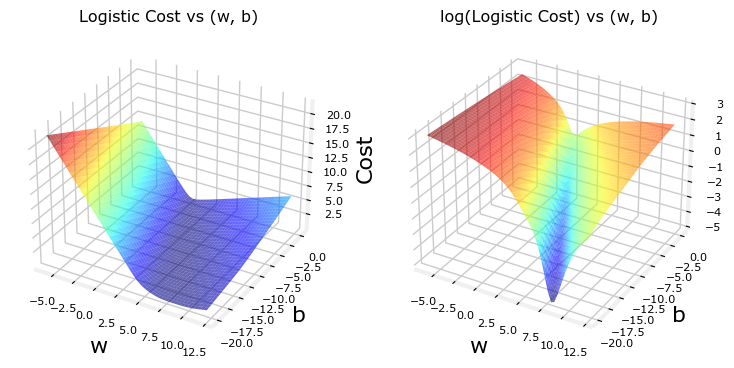

In [5]:
x1_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
y1_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)
cst = plt_logistic_cost(x1_train,y1_train)

This curve is well suited to gradient descent! It does not have plateaus, local minima, or discontinuities.

In [6]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost

# Testing the function 'compute_cost_logistic()'
x2_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y2_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)
w2 = np.array([1,1])
b2_1 = -3
b2_2 = -4
print("Cost for b = -3 : ", compute_cost_logistic(x2_train, y2_train, w2, b2_1))  # is a real decision boundary to the data
print("Cost for b = -4 : ", compute_cost_logistic(x2_train, y2_train, w2, b2_2))  # is not a decision boundary to the data

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


#### Gradient Descent for Logistic Regression

<img align="right" src="./images/C1_W3_Logistic_gradient_descent.png"     style=" width:400px; padding: 10px; " >

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;\overrightarrow{w}_j = \overrightarrow{w}_j -  \alpha \frac{\partial J(\overrightarrow{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\overrightarrow{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\overrightarrow{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}) - y^{(i)})\overrightarrow{x}^{(i)} \tag{2} \\
\frac{\partial J(\overrightarrow{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model:  
    $z = {\overrightarrow{w}}\cdot{{\overrightarrow{x}}} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    ; where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   

Eventhough, the equations do seem like those of linear regression, but they are totally different. The difference is because of what represents the $f_{\overrightarrow{w},b}(\overrightarrow{x})$ in each case. We just need to:
1. Calculate the gradients (the equations on the left).
2. Use the simulataneouslly calculated gradients to update the parameter values using the equations on the right.
3. Repeate steps 1 and 2, until an acceptable amount of error is achieved by the model.

#Do not forget to monitor gradient descent (learning curve) to be converging.

#Vectorization and feature scaling can also be helpful in classification problems using same concepts.

##### Implementation with Python

In [7]:
# Step 1 gradients
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

# Testing
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [8]:
# Step 2 gradient descent and 3 updating
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later (extra part just to inspect values and steps)
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

########################################################################################## actual impelementation code body start
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
########################################################################################### actual impelementation code body end
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion and appending (saving) no more data into the lists to inspect
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing

# Testing
x3_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y3_train = np.array([0, 0, 0, 1, 1, 1])
w_tmp  = np.zeros_like(x3_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(x3_train, y3_train, w_tmp, b_tmp, alph, iters) 
print(f"\nUpdated parameters: w:{w_out.tolist()}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

Updated parameters: w:[5.281230291780549, 5.078156075159833], b:-14.222409982019837


##### Implementation Using Scikit Learn

In [9]:
# Calling the model package
lr_model = LogisticRegression()
# Fitting or Training the model
lr_model.fit(x3_train, y3_train)

LogisticRegression()

In [10]:
# Inspecting the model's prediction about the data (Testing)
y_pred = lr_model.predict(x3_train)
print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


The predictions are of course 100% right, as we are testing on the same training dataset.

In [11]:
# Calculating the model's accuracy on the predicted data from 0 to 1, which should be applied on different dataset (testing dataset).
print("Accuracy on training set:", lr_model.score(x3_train, y3_train))

Accuracy on training set: 1.0


# The Problem of Overfitting

## Fitting Levels

<center> <img src="./images/Underfitting, Regularization and Overfitting.JPG"></center>

* Undefitting gets predictions with high error, which is called `High Bias` model.
* Generalization is where the curve fits the dataset pretty well, and goes with the tendency of the dataset. This can make the model make reasonable predictions about unknown data. This is a `Just Right` model.
* Overfitting is about fitting the training set exactly with zero cost function value. This can make the model make bad predictions about the unknown data, as shown in the down part painted in pink on the far left graph, moreover, it uses more computational power for the extra parameters. This is called `High Variance` model. As sometimes, there are outliers or unusual data in the dataset.
##### #Note That: The same concepts, applied to the regression model above, can be applied to the decision boundaries of a classification model.

## Increase the Probability of Having Good Generalized Model

1. If we have insufficient amount of data, try collecting proper amount of data
2. Include or exclude features:
    * Many Features (features themselves, or scaled features) + Insufficient data = overfitting
    * Feature selection can get you to lose data
    * Good feature selection get a `Just Right` model, with low computational work.

    #Feature selection would be better explained in course 2
3. Regularization, which is setting very small values (≈ 0) to parameters of unnecessary features.

### Regularization

<center> <img src="./images/C1_W3_Overfitting_b.png"></center>

#### Regularized Loss Function

$$ J(w,b)  = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m} \sum\limits_{j = 1}^{n} {\overrightarrow{w}_j}^2$$

The term before the `+` sign is called the `mean square error` term, while the second one is called the `regularization` term:

* Reducing the mean square error term means better fit to the data.
* Minimizing the regularization term reduces overfitting

The logic behind using lambda ($\lambda$) is balancing both goals. The two extemes of lambda ($\lambda$) are:
* $\lambda = 0$ : No use of the regularization term, overfitting.
* $\lambda ≈ \infty$ : No learning (underfitting), as the parameters are going to be really close to zero.

Therefore, choosing a good lambda ($\lambda$) is very benificial. If the lambda ($\lambda$) was small or big, it results in undesirable output.

#### Gradient Descent with Regularized Linear Regression

<center> <img src="./images/Gradient Descent with Regularized Linear Regression.JPG"     style=" width:900px;height:450px; " > </center>

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;\overrightarrow{w}_j = \overrightarrow{w}_j -  \alpha \frac{\partial J(\overrightarrow{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\overrightarrow{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\overrightarrow{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}) - y^{(i)})\overrightarrow{x}^{(i)} + \frac{\lambda}{m} {\overrightarrow{w}_j} \tag{2} \\
\frac{\partial J(\overrightarrow{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

We regularize the weight parameters `w`, while the bias parameter `b` will not be regularized. In some cases, the bias gets regularized, but it is not common.

##### Implementation with Python

In [13]:
def compute_cost_linear_regularized(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m  = X.shape[0]
    n  = len(w)

    # Error Term
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar             
    cost = cost / (2 * m)                                              #scalar  
    
    # Regulariztion Term
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

# Testing
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_regularized(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214277


In [16]:
def compute_gradient_linear_regularized(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]                 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]               
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m   
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

# Testing
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_linear_regularized(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


#### Gradient Descent with Regularized Logistic Regression

<center> <img src="./images/Gradient Descent with Regularized Logistic Regression.JPG"     style=" width:900px;height:450px; " > </center>

##### Implementation with Python

In [14]:
def compute_cost_logistic_regularized(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m,n  = X.shape
    # Error Term
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
        f_wb_i = sigmoid(z_i)                                          #scalar
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      #scalar
             
    cost = cost/m                                                      #scalar

    # Regularization Term
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

# Testing
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_regularized(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


In [18]:
def compute_gradient_logistic_regularized(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns
      dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)            : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                            #(n,)
    dj_db = 0.0                                       #scalar

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw  

# Testing
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_regularized(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]
